# 尼日利亚观众音乐品味的聚类分析

In [1]:
# 数据分析常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 去除警告
import warnings
warnings.filterwarnings('ignore')

# 读取数据
data = pd.read_csv('音乐聚类后.csv')
data

,歌曲名称,专辑,歌手,歌手主要流派,发行日期,时长,流行度,舞蹈性,声学性,能量值,器乐性,现场感,响度(dB),语音性/说唱成分,节拍速度(BPM),拍号,音乐构成聚类
0,Sparky,Mandy & The Jungle,Cruel Santino,alternative r&b,2019,144000,48,0.666,0.8510,0.420,0.534000,0.1100,-6.699,0.0829,133.015,5,2
1,shuga rush,EVERYTHING YOU HEARD IS TRUE,Odunsi (The Engine),afropop,2020,89488,30,0.710,0.0822,0.683,0.000169,0.1010,-5.640,0.3600,129.993,3,3
2,LITT!,LITT!,AYLØ,indie r&b,2018,207758,40,0.836,0.2720,0.564,0.000537,0.1100,-7.127,0.0424,130.005,4,0
3,Confident / Feeling Cool,Enjoy Your Life,Lady Donli,nigerian pop,2019,175135,14,0.894,0.7980,0.611,0.000187,0.0964,-4.961,0.1130,111.087,4,0
4,wanted you,rare.,Odunsi (The Engine),afropop,2018,152049,25,0.702,0.1160,0.833,0.910000,0.3480,-6.044,0.0447,105.115,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,Kwaroro,Kwaroro,J. Martins,afro dancehall,2015,193960,10,0.735,0.6320,0.918,0.193000,0.0718,-2.582,0.0355,127.954,4,0
526,Concert Party,Afro Escape,Various Artists,afro dancehall,2015,252708,0,0.602,0.1770,0.883,0.000004,0.1190,-6.183,0.0778,154.010,4,0
527,Loko,Applaudise,Iyanya,afro dancehall,2015,223159,0,0.729,0.2380,0.864,0.000000,0.1950,-3.942,0.0668,121.058,4,0
528,Gift,Applaudise,Iyanya,afro dancehall,2015,278280,0,0.809,0.0490,0.806,0.000000,0.0659,-6.547,0.2340,123.997,4,3


In [2]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   歌曲名称       530 non-null    object 
 1   专辑         530 non-null    object 
 2   歌手         530 non-null    object 
 3   歌手主要流派     530 non-null    object 
 4   发行日期       530 non-null    int64  
 5   时长         530 non-null    int64  
 6   流行度        530 non-null    int64  
 7   舞蹈性        530 non-null    float64
 8   声学性        530 non-null    float64
 9   能量值        530 non-null    float64
 10  器乐性        530 non-null    float64
 11  现场感        530 non-null    float64
 12  响度(dB)     530 non-null    float64
 13  语音性/说唱成分   530 non-null    float64
 14  节拍速度(BPM)  530 non-null    float64
 15  拍号         530 non-null    int64  
 16  音乐构成聚类     530 non-null    int64  
dtypes: float64(8), int64(5), object(4)
memory usage: 70.5+ KB


歌曲名称、专辑、艺术家、艺术家顶级流派、发行日期、长度、流行度、舞蹈性、音乐性、能量、乐器性、活跃度、响度、语速、节奏和时值  
**各列都是530，均不存在空值，故无需进行缺失值处理。数据类型见Dtype。通过观察，这是一个比较规整的数据集，无需进行缺失值等处理。**


#  对歌手进行分类，通过如，热度情况、发歌量、首歌年份、存续年份、等对歌手划分不同类别，帮助筛选当下有发展前景的歌手群体

In [3]:
# 根据歌手和发行日期对数据进行汇总
data_summary = data.groupby(['歌手', '发行日期']).agg({'歌曲名称': 'count', '流行度': 'sum','音乐构成聚类':  lambda x: list(set(x))}).reset_index()
data_summary.rename(columns={'歌曲名称': '歌曲数量', '流行度': '年总流行度', '音乐构成聚类': '本年音乐创作类型'}, inplace=True)
data_summary


,歌手,发行日期,歌曲数量,年总流行度,本年音乐创作类型
0,2Baba,2004,1,39,[3]
1,2Baba,2006,1,34,[1]
2,2Baba,2010,1,0,[0]
3,2Baba,2011,1,0,[3]
4,2Baba,2014,2,39,[3]
...,...,...,...,...,...
327,Yung L,2013,1,14,[0]
328,Zlatan,2019,1,54,[3]
329,chike,2020,1,30,[0]
330,prettyboydo,2018,1,29,[3]


计算和汇总输出（假定现在是2021年），歌手，出道间隔时间（2021-第一次有发歌的时间），最近发歌间隔时间（2021-最近一次发歌时间），累计总热度，近三年发歌数量（2020，2019，2018），近期三年总热度，历史音乐创作类型，近三年音乐创作类型

In [ ]:
import pandas as pd
import numpy as np

# 设定当前年份为2021年
current_year = 2021
recent_years = [2018, 2019, 2020]

# 获取所有歌手列表作为基础
all_singers = data_summary['歌手'].unique()
all_singers_df = pd.DataFrame({'歌手': all_singers})

print(f"原始歌手数量: {len(all_singers)}")

# 1. 计算每个歌手的首次发歌年份和最近发歌年份
first_release = data_summary.groupby('歌手')['发行日期'].min().reset_index()
first_release.columns = ['歌手', '首次发歌年份']

latest_release = data_summary.groupby('歌手')['发行日期'].max().reset_index()
latest_release.columns = ['歌手', '最近发歌年份']

# 2. 计算出道间隔时间和最近发歌间隔时间
first_release['出道间隔时间(年)'] = current_year - first_release['首次发歌年份']
latest_release['最近发歌间隔时间(年)'] = current_year - latest_release['最近发歌年份']

# 3. 计算每个歌手的累计总热度
total_popularity = data_summary.groupby('歌手')['年总流行度'].sum().reset_index()
total_popularity.columns = ['歌手', '累计总热度']

# 4. 计算每个歌手近三年的发歌数量和总热度
recent_years_data = data_summary[data_summary['发行日期'].isin(recent_years)]

# 近三年发歌总数量（为所有歌手创建记录，没有近三年发歌的设为0）
if len(recent_years_data) > 0:
    recent_song_counts = recent_years_data.groupby('歌手')['歌曲数量'].sum().reset_index()
    recent_song_counts.columns = ['歌手', '近三年发歌总数量']
    # 确保所有歌手都有记录
    recent_song_counts = all_singers_df.merge(recent_song_counts, on='歌手', how='left')
    recent_song_counts['近三年发歌总数量'] = recent_song_counts['近三年发歌总数量'].fillna(0)
else:
    recent_song_counts = all_singers_df.copy()
    recent_song_counts['近三年发歌总数量'] = 0

# 近三年总热度（为所有歌手创建记录，没有近三年发歌的设为0）
if len(recent_years_data) > 0:
    recent_popularity = recent_years_data.groupby('歌手')['年总流行度'].sum().reset_index()
    recent_popularity.columns = ['歌手', '近三年总热度']
    # 确保所有歌手都有记录
    recent_popularity = all_singers_df.merge(recent_popularity, on='歌手', how='left')
    recent_popularity['近三年总热度'] = recent_popularity['近三年总热度'].fillna(0)
else:
    recent_popularity = all_singers_df.copy()
    recent_popularity['近三年总热度'] = 0

# 5. 汇总每个歌手的历史音乐创作类型和近三年音乐创作类型
# 处理音乐创作类型数据的空值和异常值
def safe_process_genres(x):
    """安全处理音乐类型数据"""
    try:
        if pd.isna(x) or x is None:
            return []
        if isinstance(x, list):
            return [g for g in x if g != -1 and not pd.isna(g)]
        return []
    except:
        return []

# 确保音乐创作类型列没有空值问题
data_summary['本年音乐创作类型_clean'] = data_summary['本年音乐创作类型'].apply(safe_process_genres)

# 历史音乐创作类型
all_genres = data_summary.groupby('歌手')['本年音乐创作类型_clean'].apply(
    lambda x: list(set([g for genres in x for g in genres if g != -1 and not pd.isna(g)]))
).reset_index()
all_genres.columns = ['歌手', '历史音乐创作类型']

# 近三年音乐创作类型
if len(recent_years_data) > 0:
    # 为近三年数据也添加清理后的音乐类型列
    recent_years_data_clean = recent_years_data.copy()
    recent_years_data_clean['本年音乐创作类型_clean'] = recent_years_data_clean['本年音乐创作类型'].apply(safe_process_genres)
    
    recent_genres = recent_years_data_clean.groupby('歌手')['本年音乐创作类型_clean'].apply(
        lambda x: list(set([g for genres in x for g in genres if g != -1 and not pd.isna(g)]))
    ).reset_index()
    recent_genres.columns = ['歌手', '近三年音乐创作类型']
    
    # 确保所有歌手都有记录
    recent_genres = all_singers_df.merge(recent_genres, on='歌手', how='left')
    recent_genres['近三年音乐创作类型'] = recent_genres['近三年音乐创作类型'].apply(
        lambda x: x if isinstance(x, list) else []
    )
else:
    recent_genres = all_singers_df.copy()
    recent_genres['近三年音乐创作类型'] = [[] for _ in range(len(recent_genres))]

# 6. 使用left join合并所有结果，确保保留所有歌手
result = all_singers_df.copy()
result = result.merge(first_release, on='歌手', how='left')
result = result.merge(latest_release, on='歌手', how='left')
result = result.merge(total_popularity, on='歌手', how='left')
result = result.merge(recent_song_counts, on='歌手', how='left')
result = result.merge(recent_popularity, on='歌手', how='left')
result = result.merge(all_genres, on='歌手', how='left')
result = result.merge(recent_genres, on='歌手', how='left')

# 7. 最终的空值处理和数据清理
# 数值型列的空值处理
numeric_columns = ['首次发歌年份', '最近发歌年份', '出道间隔时间(年)', 
                  '最近发歌间隔时间(年)', '累计总热度', '近三年发歌总数量', '近三年总热度']

for col in numeric_columns:
    if col in result.columns:
        result[col] = result[col].fillna(0)

# 列表型列的空值处理
list_columns = ['历史音乐创作类型', '近三年音乐创作类型']
for col in list_columns:
    if col in result.columns:
        result[col] = result[col].apply(lambda x: x if isinstance(x, list) else [])

# 数据类型转换
for col in ['首次发歌年份', '最近发歌年份', '出道间隔时间(年)', 
           '最近发歌间隔时间(年)', '近三年发歌总数量']:
    if col in result.columns:
        result[col] = result[col].astype(int)

# # 输出结果和统计信息
# print(f"最终结果歌手数量: {len(result)}")
# print(f"各列空值统计:")
# print(result.isnull().sum())
# print(f"\n近三年有发歌的歌手数量: {(result['近三年发歌总数量'] > 0).sum()}")
# print(f"近三年没有发歌的歌手数量: {(result['近三年发歌总数量'] == 0).sum()}")

print("\n歌手数据汇总结果：")
result


原始歌手数量: 171

歌手数据汇总结果：


,歌手,首次发歌年份,出道间隔时间(年),最近发歌年份,最近发歌间隔时间(年),累计总热度,近三年发歌总数量,近三年总热度,历史音乐创作类型,近三年音乐创作类型
0,2Baba,2004,17,2014,7,112,0,0.0,"[0, 1, 3]",[]
1,9ice,2008,13,2009,12,99,0,0.0,[2],[]
2,AYLØ,2017,4,2019,2,96,3,72.0,[0],[0]
3,Adekunle Gold,2016,5,2020,1,36,2,36.0,"[0, 3]",[0]
4,Afro B,2018,3,2018,3,0,1,0.0,[0],[0]
...,...,...,...,...,...,...,...,...,...,...
166,Yemi Alade,2013,8,2018,3,179,1,35.0,"[0, 2, 3]",[0]
167,Yung L,2013,8,2013,8,14,0,0.0,[0],[]
168,Zlatan,2019,2,2019,2,54,1,54.0,[3],[3]
169,chike,2020,1,2020,1,30,1,30.0,[0],[0]


In [23]:
df=result.copy()
df = df[['歌手',  '出道间隔时间(年)',  '最近发歌间隔时间(年)', '累计总热度','近三年发歌总数量', '近三年总热度', '历史音乐创作类型', '近三年音乐创作类型']]
df

,歌手,出道间隔时间(年),最近发歌间隔时间(年),累计总热度,近三年发歌总数量,近三年总热度,历史音乐创作类型,近三年音乐创作类型
0,2Baba,17,7,112,0,0.0,"[0, 1, 3]",[]
1,9ice,13,12,99,0,0.0,[2],[]
2,AYLØ,4,2,96,3,72.0,[0],[0]
3,Adekunle Gold,5,1,36,2,36.0,"[0, 3]",[0]
4,Afro B,3,3,0,1,0.0,[0],[0]
...,...,...,...,...,...,...,...,...
166,Yemi Alade,8,3,179,1,35.0,"[0, 2, 3]",[0]
167,Yung L,8,8,14,0,0.0,[0],[]
168,Zlatan,2,2,54,1,54.0,[3],[3]
169,chike,1,1,30,1,30.0,[0],[0]


对于聚类任务，StandardScaler通常更好，以下是详细的对比分析：  
**StandardScaler vs MinMaxScaler 对比**  
**StandardScaler**（推荐）  
✅ 保持数据分布形状：不改变原始数据的分布特征  
✅ 处理异常值更稳健：受极值影响较小  
✅ 适合距离度量：聚类算法通常基于欧几里得距离  
✅ 理论基础更强：许多机器学习算法假设数据呈正态分布  
**MinMaxScaler**  
✅ 固定范围：所有特征都在[0,1]范围内   
✅ 保持原始分布：线性变换，保持原始数据点之间的相对距离  
❌ 对异常值敏感：一个极值会压缩其他所有数据  
- 但是此处为了后面更好绘制雷达图展现各分类的特征，需要将数据缩放到0-1范围，所以使用MinMaxScaler

In [34]:
# 选用 出道总间隔时间、最近发歌间隔时间、累计总热度、近三年发歌总数量、近三年总热度作为特征 对歌手进行聚类分析
from sklearn.preprocessing import StandardScaler  # 标准化->将数据转换为均值为0，方差为1的分布
from sklearn.preprocessing import MinMaxScaler    # MinMaxScaler将数据缩放到0-1范围
# 1. 提取关键特征
features = df[['出道间隔时间(年)', '最近发歌间隔时间(年)', '累计总热度', '近三年发歌总数量', '近三年总热度']]

# 2. 数据标准化
scaler = MinMaxScaler() # 使用MinMaxScaler将数据缩放到0-1范围
scaled_features = scaler.fit_transform(features)
# scaled_features

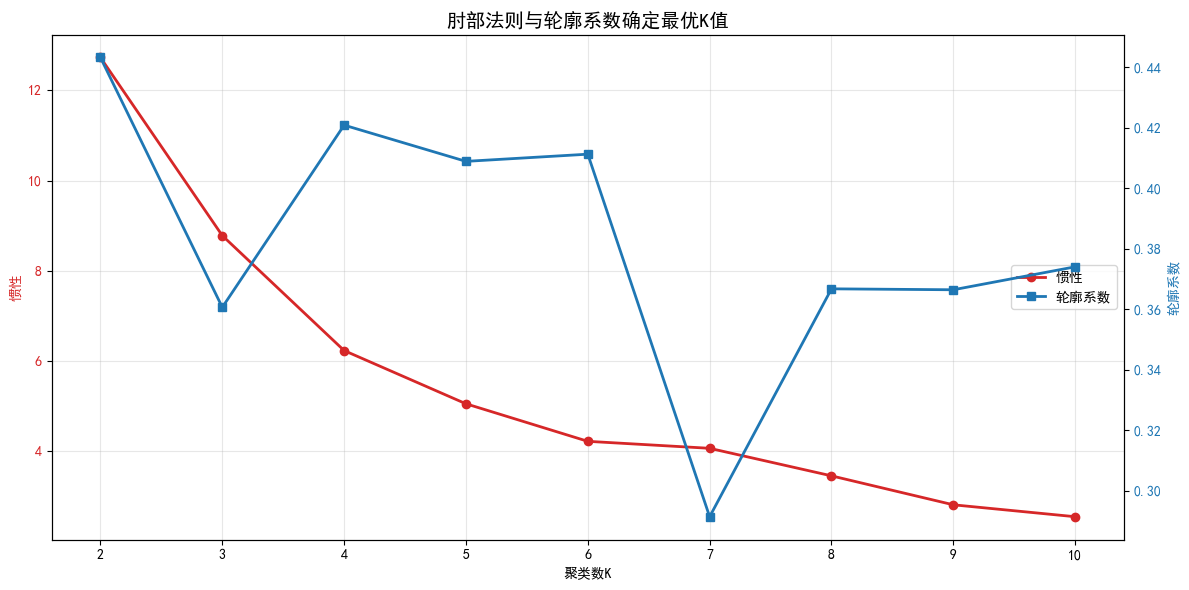

K值分析结果：
K	惯性		轮廓系数
------------------------------
2	12.73		0.443
3	8.78		0.361
4	6.22		0.421
5	5.04		0.409
6	4.21		0.411
7	4.05		0.291
8	3.44		0.367
9	2.80		0.366
10	2.53		0.374


In [ ]:
# KMeans聚类
# 寻找最佳簇数
# 使用肘部法则+轮廓系数确定K值（双轴图）
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
# 计算肘部法则的惯性值
inertia = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    # 计算惯性（肘部法则）
    inertia.append(kmeans.inertia_)
    # 计算轮廓系数
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)
# 创建双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))
# 第一个y轴：惯性（肘部法则）
color1 = 'tab:red'
ax1.set_xlabel('聚类数K')
ax1.set_ylabel('惯性', color=color1)
line1 = ax1.plot(range(2, 11), inertia, marker='o', color=color1, linewidth=2, markersize=6, label='惯性')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, alpha=0.3)
# 第二个y轴：轮廓系数
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('轮廓系数', color=color2)
line2 = ax2.plot(range(2, 11), silhouette_scores, marker='s', color=color2, linewidth=2, markersize=6, label='轮廓系数')
ax2.tick_params(axis='y', labelcolor=color2)
plt.title('肘部法则与轮廓系数确定最优K值', fontsize=14, fontweight='bold')# 设置标题和图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')
ax1.set_xticks(range(2, 11))
plt.tight_layout()
plt.show()

print("K值分析结果：")
print("K\t惯性\t\t轮廓系数")
print("-" * 30)
for i, k in enumerate(range(2, 11)):
    print(f"{k}\t{inertia[i]:.2f}\t\t{silhouette_scores[i]:.3f}")


**惯性(Inertia)趋势分析**
惯性表示样本点到聚类中心的距离平方和，越小表示聚类越紧凑。从数据可见：  
急剧下降阶段(K=2→4)：惯性从12.73急剧下降到6.22，下降比例达51%，表明聚类质量显著提升  
缓慢下降阶段(K=4→7)：惯性从6.22降至4.05，下降速率明显放缓  
平缓阶段(K=7→10)：惯性变化更加平缓，从4.05降至2.53，边际收益递减  

**轮廓系数(Silhouette Score)分析**
轮廓系数衡量聚类的紧凑度和分离度，范围为[-1,1]，越接近1表示聚类效果越好：  
最佳值：K=2时达到最高值0.443，表明两个聚类分离得最为清晰  
第二最佳：K=4时达到0.421，接近全局最优  
局部波动：K=3→6期间波动不大(0.361-0.421)  
明显下降：K=7时显著下降至0.291，表明过度聚类  
小幅回升：K=8→10小幅回升至0.374  
> - K=4 (首选):惯性显著下降(6.22),轮廓系数接近最高(0.421),惯性下降曲线中的明显"拐点",平衡了模型复杂度和聚类质量
> - K=2 (备选):轮廓系数最高(0.443),聚类分离度最佳,但可能过于简化，丢失数据结构细节
> - K=6 (可选):中等轮廓系数(0.411),惯性进一步下降(4.21),如果需要更细粒度聚类，可以考虑

In [35]:
# 选择K=4作为最佳簇数
k = 4
# KMeans聚类
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)
# 聚类结果
labels = kmeans.labels_
df['聚类标签'] = labels
df

,歌手,出道间隔时间(年),最近发歌间隔时间(年),累计总热度,近三年发歌总数量,近三年总热度,历史音乐创作类型,近三年音乐创作类型,dbscan_cluster,聚类标签
0,2Baba,17,7,112,0,0.0,"[0, 1, 3]",[],-1,0
1,9ice,13,12,99,0,0.0,[2],[],-1,0
2,AYLØ,4,2,96,3,72.0,[0],[0],-1,1
3,Adekunle Gold,5,1,36,2,36.0,"[0, 3]",[0],-1,1
4,Afro B,3,3,0,1,0.0,[0],[0],-1,1
...,...,...,...,...,...,...,...,...,...,...
166,Yemi Alade,8,3,179,1,35.0,"[0, 2, 3]",[0],-1,3
167,Yung L,8,8,14,0,0.0,[0],[],-1,3
168,Zlatan,2,2,54,1,54.0,[3],[3],-1,1
169,chike,1,1,30,1,30.0,[0],[0],-1,1


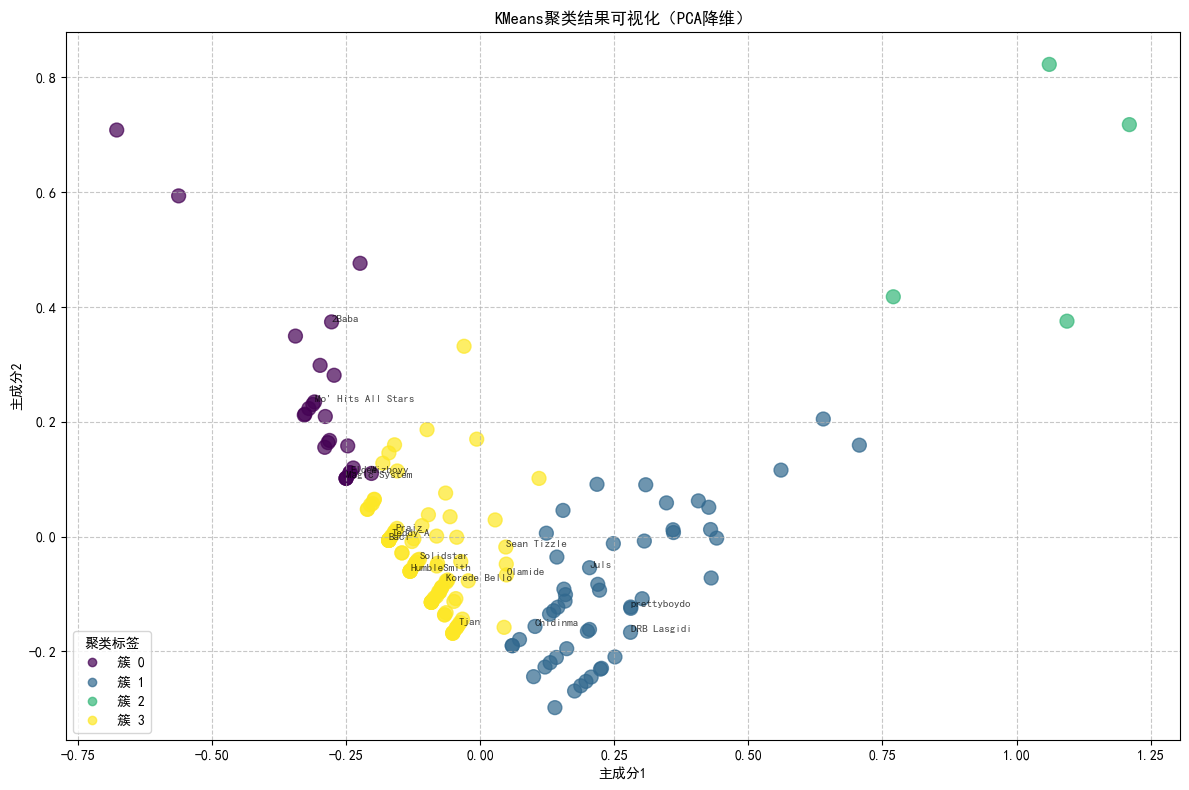

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 1. 数据降维（主成分分析）
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# 2. 创建散点图
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    reduced_features[:, 0], 
    reduced_features[:, 1], 
    c=df['聚类标签'],
    cmap='viridis',
    s=100,
    alpha=0.7
)

# 3. 添加歌手标签（仅显示部分典型歌手）
for i, (x, y, label) in enumerate(zip(reduced_features[:, 0], reduced_features[:, 1], df['歌手'])):
    if i % 10 == 0:  # 每隔10个显示一个标签，避免拥挤
        plt.annotate(label, (x, y), fontsize=8, alpha=0.7)

# 4. 添加图例和标题
plt.legend(handles=scatter.legend_elements()[0], 
           labels=[f'簇 {i}' for i in range(k)],
           title='聚类标签')
plt.title('KMeans聚类结果可视化（PCA降维）')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

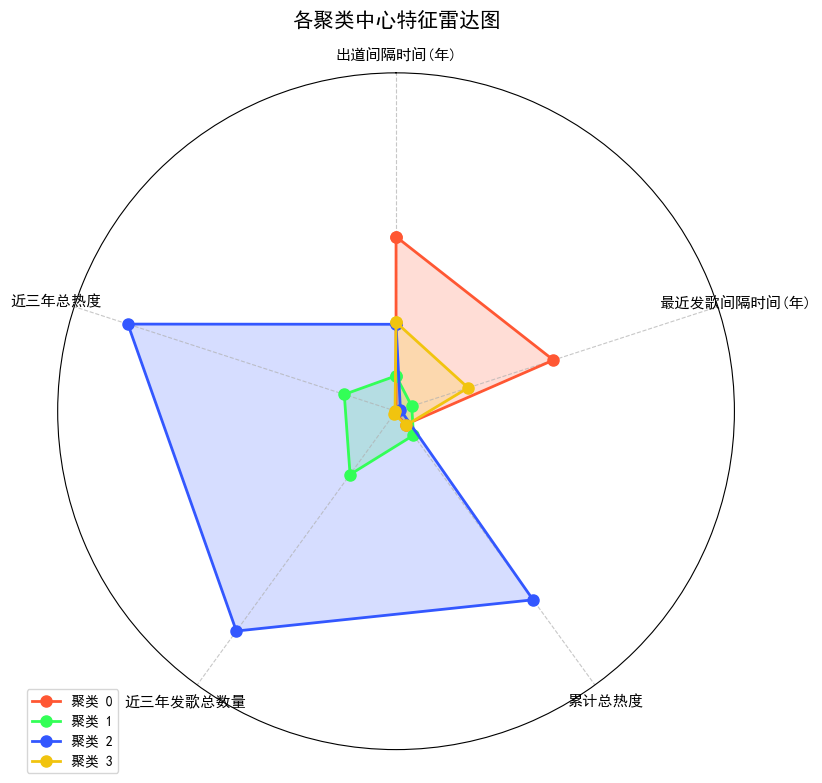


各聚类中心特征值:

聚类 0:
出道间隔时间(年): 0.502
最近发歌间隔时间(年): 0.476
累计总热度: 0.047
近三年发歌总数量: 0.005
近三年总热度: 0.000

聚类 1:
出道间隔时间(年): 0.102
最近发歌间隔时间(年): 0.047
累计总热度: 0.085
近三年发歌总数量: 0.225
近三年总热度: 0.157

聚类 2:
出道间隔时间(年): 0.250
最近发歌间隔时间(年): 0.013
累计总热度: 0.670
近三年发歌总数量: 0.781
近三年总热度: 0.811

聚类 3:
出道间隔时间(年): 0.256
最近发歌间隔时间(年): 0.218
累计总热度: 0.050
近三年发歌总数量: 0.009
近三年总热度: 0.003


In [50]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt

# 1. 获取聚类中心
centroids = kmeans.cluster_centers_

# 2. 创建雷达图
features = ['出道间隔时间(年)', '最近发歌间隔时间(年)', '累计总热度', '近三年发歌总数量', '近三年总热度']  # 特征名称
n_features = len(features)

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# 创建图形和极坐标子图
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# 计算角度
angles = [n / float(n_features) * 2 * pi for n in range(n_features)]
angles += angles[:1]  # 闭合雷达图

# 定义颜色
colors = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F']

# 绘制每个聚类中心的雷达图
for i, centroid in enumerate(centroids):
    values = centroid.tolist()
    values += values[:1]  # 闭合雷达图的数据
    ax.plot(angles, values, 'o-', linewidth=2, label=f'聚类 {i}', color=colors[i], markersize=8)
    ax.fill(angles, values, alpha=0.2, color=colors[i])

# 设置刻度标签
ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=11)

# 设置y轴范围（根据数据的实际范围调整）
min_value = min([min(centroid) for centroid in centroids])
max_value = max([max(centroid) for centroid in centroids])
# 扩展范围使图表更美观
y_limit = max(abs(min_value), abs(max_value)) * 1.2
ax.set_ylim(-y_limit if min_value < 0 else 0, max_value * 1.2)

# 添加标签和网格线
sigma_labels = []
sigma_values = []



ax.set_yticks(sigma_values)
ax.set_yticklabels(sigma_labels, fontsize=10)

# 添加网格线
ax.grid(True, linestyle='--', alpha=0.7)

# 调整起始角度和方向
ax.set_theta_zero_location("N")  # 从北方向(top)开始
ax.set_theta_direction(-1)  # 顺时针方向

# 添加标题和图例
plt.title('各聚类中心特征雷达图', fontsize=15, pad=15)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=10)

plt.tight_layout()
plt.show()

# 3. 输出聚类中心特征值
print("\n各聚类中心特征值:")
print("=" * 60)
for i, centroid in enumerate(centroids):
    print(f"\n聚类 {i}:")
    for j, feature in enumerate(features):
        print(f"{feature}: {centroid[j]:.3f}")


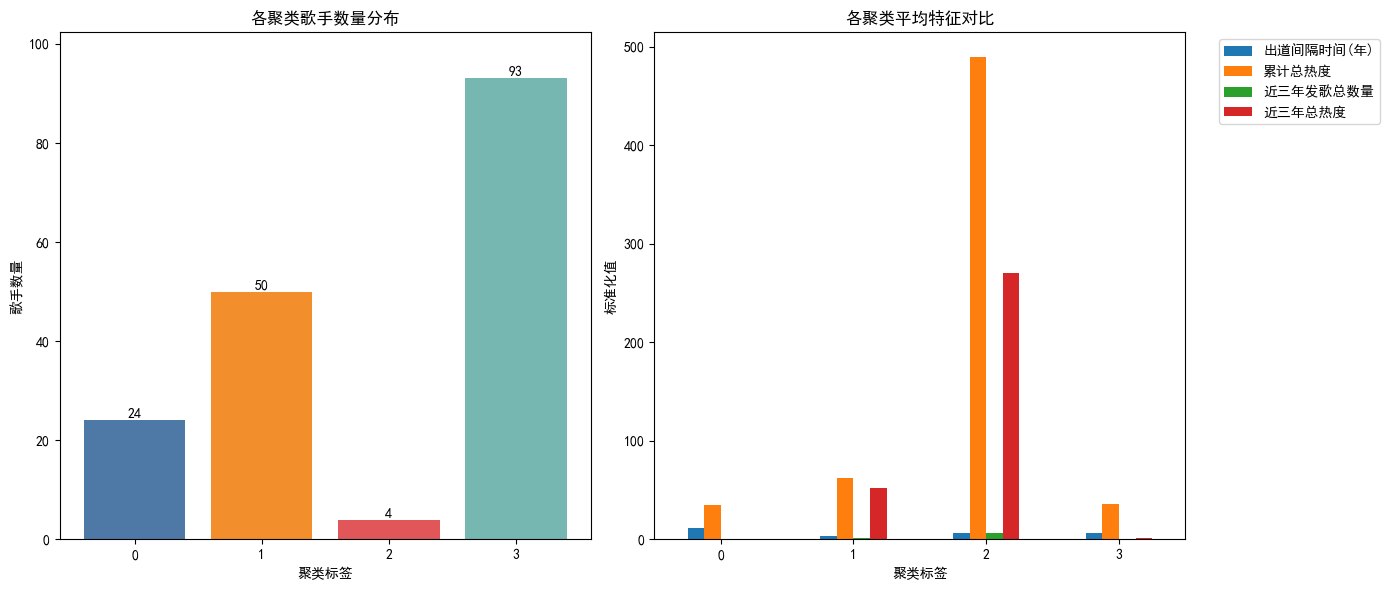

In [52]:
# 1. 统计各簇歌手数量
cluster_counts = df['聚类标签'].value_counts().sort_index()

# 2. 统计各簇平均特征
cluster_stats = df.groupby('聚类标签')[['出道间隔时间(年)', '累计总热度', '近三年发歌总数量', '近三年总热度']].mean()

# 3. 创建柱状图
plt.figure(figsize=(14, 6))

# 左侧：各簇歌手数量
plt.subplot(1, 2, 1)
bars = plt.bar(
    cluster_counts.index.astype(str), 
    cluster_counts.values,
    color=['#4e79a7', '#f28e2c', '#e15759', '#76b7b2']  # 自定义颜色
)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}', ha='center', va='bottom', fontsize=10)
plt.title('各聚类歌手数量分布')
plt.xlabel('聚类标签')
plt.ylabel('歌手数量')
plt.ylim(0, cluster_counts.max() * 1.1)  # 调整y轴范围

# 右侧：各簇平均特征
plt.subplot(1, 2, 2)
cluster_stats.plot(kind='bar', ax=plt.gca())
plt.title('各聚类平均特征对比')
plt.xlabel('聚类标签')
plt.ylabel('标准化值')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.tight_layout()
plt.show()

以下是对4个聚类中心特征值的深度解析，结合业务场景提炼各簇歌手的核心特征与运营策略：  


### 一、聚类特征对比表（标准化值）
| 特征维度          | 聚类0       | 聚类1       | 聚类2       | 聚类3       |
|-------------------|-------------|-------------|-------------|-------------|
| 出道间隔时间(年)  | 0.502（高） | 0.102（低） | 0.250（中） | 0.256（中） |
| 最近发歌间隔时间(年) | 0.476（高） | 0.047（低） | 0.013（极低）| 0.218（中低）|
| 累计总热度        | 0.047（极低）| 0.085（低） | 0.670（高） | 0.050（极低）|
| 近三年发歌总数量  | 0.005（极低）| 0.225（中低）| 0.781（高） | 0.009（极低）|
| 近三年总热度      | 0.000（极低）| 0.157（中低）| 0.811（极高）| 0.003（极低）|


### 二、各聚类核心特征与业务定义
#### 1. **聚类0：沉寂型歌手（出道久且近期无活跃）**
- **特征**：  
  - 出道间隔时间（0.502）和最近发歌间隔（0.476）均为最高，累计热度（0.047）和近三年数据趋近于0。  
  - **典型案例**：如2Baba（最近发歌间隔7年，近三年无作品）。  
- **业务定位**：  
  - 历史老牌歌手，但长期未发歌，市场影响力基本消失。  
- **运营策略**：  
  - **风险预警**：优先评估续约价值，避免资源浪费；  
  - **激活可能**：若累计热度曾较高（如2Baba累计112），可尝试怀旧企划（如经典专辑重制）。

#### 2. **聚类1：新兴潜力型歌手（出道时间短，初步活跃）**
- **特征**：  
  - 出道间隔（0.102）和最近发歌间隔（0.047）最短，近三年发歌量（0.225）和热度（0.157）中等。  
  - **典型案例**：chike（出道1年，近三年发歌1首，热度30）。  
- **业务定位**：  
  - 刚入行的新人，处于市场试探期，有基础活跃度但影响力尚未爆发。  
- **运营策略**：  
  - **资源倾斜**：增加平台曝光（如推荐位、合辑收录），加速粉丝积累；  
  - **数据追踪**：重点监测后续作品热度变化，筛选潜力股。

#### 3. **聚类2：头部活跃型歌手（高热度+高产出）**
- **特征**：  
  - 近三年发歌量（0.781）和热度（0.811）均为最高，最近发歌间隔（0.013）极低，累计热度（0.670）高。  
  - **典型案例**：AYLØ（近三年发歌3首，热度72）、prettyboydo（发歌2首，热度52）。  
- **业务定位**：  
  - 当前市场的核心力量，高产出且高人气，处于职业生涯上升期。  
- **运营策略**：  
  - **重点投入**：签约独家合作、开发周边商业价值（如代言、巡演）；  
  - **风险防控**：避免过度消耗人气，合理规划发歌频率。

#### 4. **聚类3：边缘稳定型歌手（活跃度中等，热度低迷）**
- **特征**：  
  - 出道间隔（0.256）和最近发歌间隔（0.218）中等，但近三年发歌量（0.009）和热度（0.003）接近0。  
  - **典型案例**：Afro B（近三年发歌1首，热度0）。  
- **业务定位**：  
  - 出道时间不长不短，但作品影响力极弱，处于行业边缘。  
- **运营策略**：  
  - **成本控制**：减少推广投入，转为低成本试错（如短视频BGM合作）；  
  - **风格调整**：分析同簇歌手失败原因，探索转型可能性（如更换音乐类型）。


### 三、业务应用：资源分配与策略矩阵
#### 1. **四象限运营模型**
以**近三年总热度**为纵轴、**近三年发歌量**为横轴，各聚类分布如下：  
- **第一象限（高热度+高产出，聚类2）**：投入70%资源，打造标杆艺人；  
- **第二象限（高热度+低产出，无对应聚类）**：需挖掘潜在歌手；  
- **第三象限（低热度+低产出，聚类0/3）**：投入10%资源，或启动淘汰机制；  
- **第四象限（低热度+高产出，聚类1）**：投入20%资源，观察潜力。

#### 2. **合作优先级排序**
| 优先级 | 聚类       | 合作价值点                | 示例歌手       |
|--------|------------|---------------------------|----------------|
| 1      | 聚类2      | 高流量带动品牌曝光        | AYLØ、prettyboydo |
| 2      | 聚类1      | 低成本培育未来头部艺人    | chike           |
| 3      | 聚类0      | 怀旧IP开发（低成本激活）  | 2Baba           |
| 4      | 聚类3      | 谨慎合作或暂停投入        | Afro B         |

#### 3. **风险预警指标**
- **高风险簇**：聚类0（沉寂风险）、聚类3（边缘化风险），需监控发歌间隔超过2年的歌手；  
- **机会簇**：聚类1中近三年热度增速超过20%的歌手（如Adekunle Gold），可升级为重点培育对象。

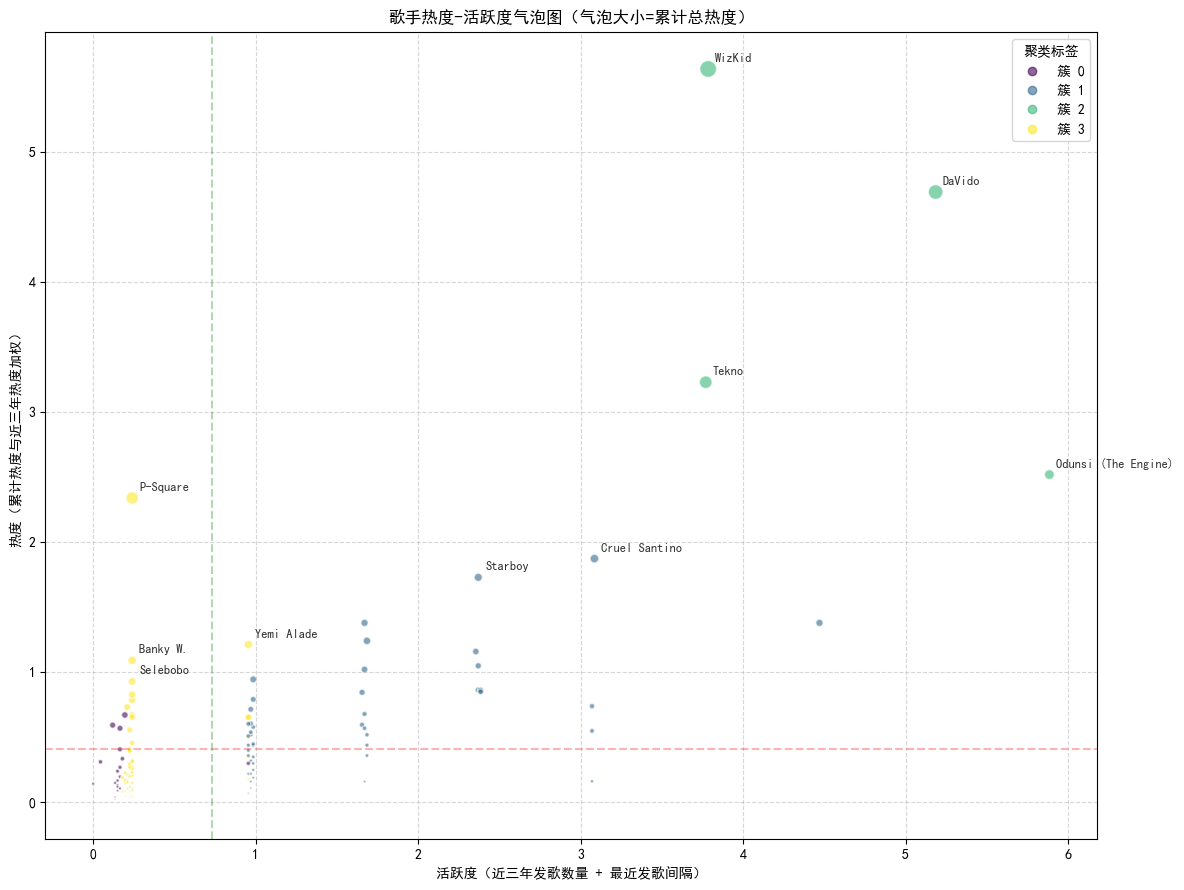

In [53]:
# 1. 计算热度和活跃度指标-自定义，这里假定同时关注历史和近期，因此使用累计与近三年的加权平均实现
df['热度'] = (df['累计总热度'] * 0.6 + df['近三年总热度'] * 0.4) / 100  # 加权平均并缩放
df['活跃度'] = (df['近三年发歌总数量'] * 0.7 + 
              (1 - df['最近发歌间隔时间(年)'] / df['最近发歌间隔时间(年)'].max()) * 0.3)  # 加权组合

# 2. 创建气泡图
plt.figure(figsize=(12, 9))
scatter = plt.scatter(
    x=df['活跃度'],
    y=df['热度'],
    s=df['累计总热度'] / 5,  # 气泡大小表示累计热度
    c=df['聚类标签'],
    cmap='viridis',
    alpha=0.6,
    edgecolors='w',
    linewidth=1
)

# 3. 添加典型歌手标签
top_singers = df.sort_values('累计总热度', ascending=False).head(10)
for _, row in top_singers.iterrows():
    plt.annotate(
        row['歌手'],
        (row['活跃度'], row['热度']),
        fontsize=9,
        alpha=0.8,
        xytext=(5, 5),
        textcoords='offset points'
    )

# 4. 添加参考线和图例
plt.axhline(y=df['热度'].mean(), color='r', linestyle='--', alpha=0.3, label='热度均值')
plt.axvline(x=df['活跃度'].mean(), color='g', linestyle='--', alpha=0.3, label='活跃度均值')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=[f'簇 {i}' for i in range(k)],
           title='聚类标签',
           loc='upper right')
plt.title('歌手热度-活跃度气泡图（气泡大小=累计总热度）')
plt.xlabel('活跃度（近三年发歌数量 + 最近发歌间隔）')
plt.ylabel('热度（累计热度与近三年热度加权）')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 歌手热度 - 活跃度气泡图分析报告

- **横轴（活跃度）**：融合“近三年发歌数量 + 最近发歌间隔”，数值越高代表歌手近期创作越活跃、发声越频繁  
- **纵轴（热度）**：体现“累计热度 + 近三年热度”，反映歌手历史沉淀与当前市场声量  
- **气泡大小**：与“累计总热度”正相关，直观呈现歌手的历史影响力规模  

|聚类标签|典型歌手|位置特征|业务价值|
| ---- | ---- | ---- | ---- |
|簇2（绿色）|WizKid、Davido|**高热度+高活跃**<br>（纵轴＞4，横轴＞3）|行业头部核心，具备强市场号召力与持续创作力|
|簇3（黄色）|P - Square|**中热度+低活跃**<br>（纵轴2 - 3，横轴＜1）|经典IP型歌手，依赖历史热度，近期创作停滞|
|簇1（蓝色）|Starboy、Cruel Santino|**中低热度+中活跃**<br>（纵轴1 - 2，横轴2 - 4）|新锐/腰部歌手，以稳定创作维持市场存在|
|簇0（紫色）|Banky W、Selebobo|**低热度+低活跃**<br>（纵轴＜1，横轴＜1）|边缘歌手，创作与市场声量双低迷|  




